In [25]:
import pandas as pd
data=pd.read_csv("train.csv")
outcomes=data['Survived']
features=data.drop(['Name','Survived','Cabin', 'Ticket'],axis=1)
features.head()
features=pd.get_dummies(features)
features=features.fillna(0)
features.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features, outcomes, test_size=0.2, random_state=42)

from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
y_predict= model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)


0.776536312849162

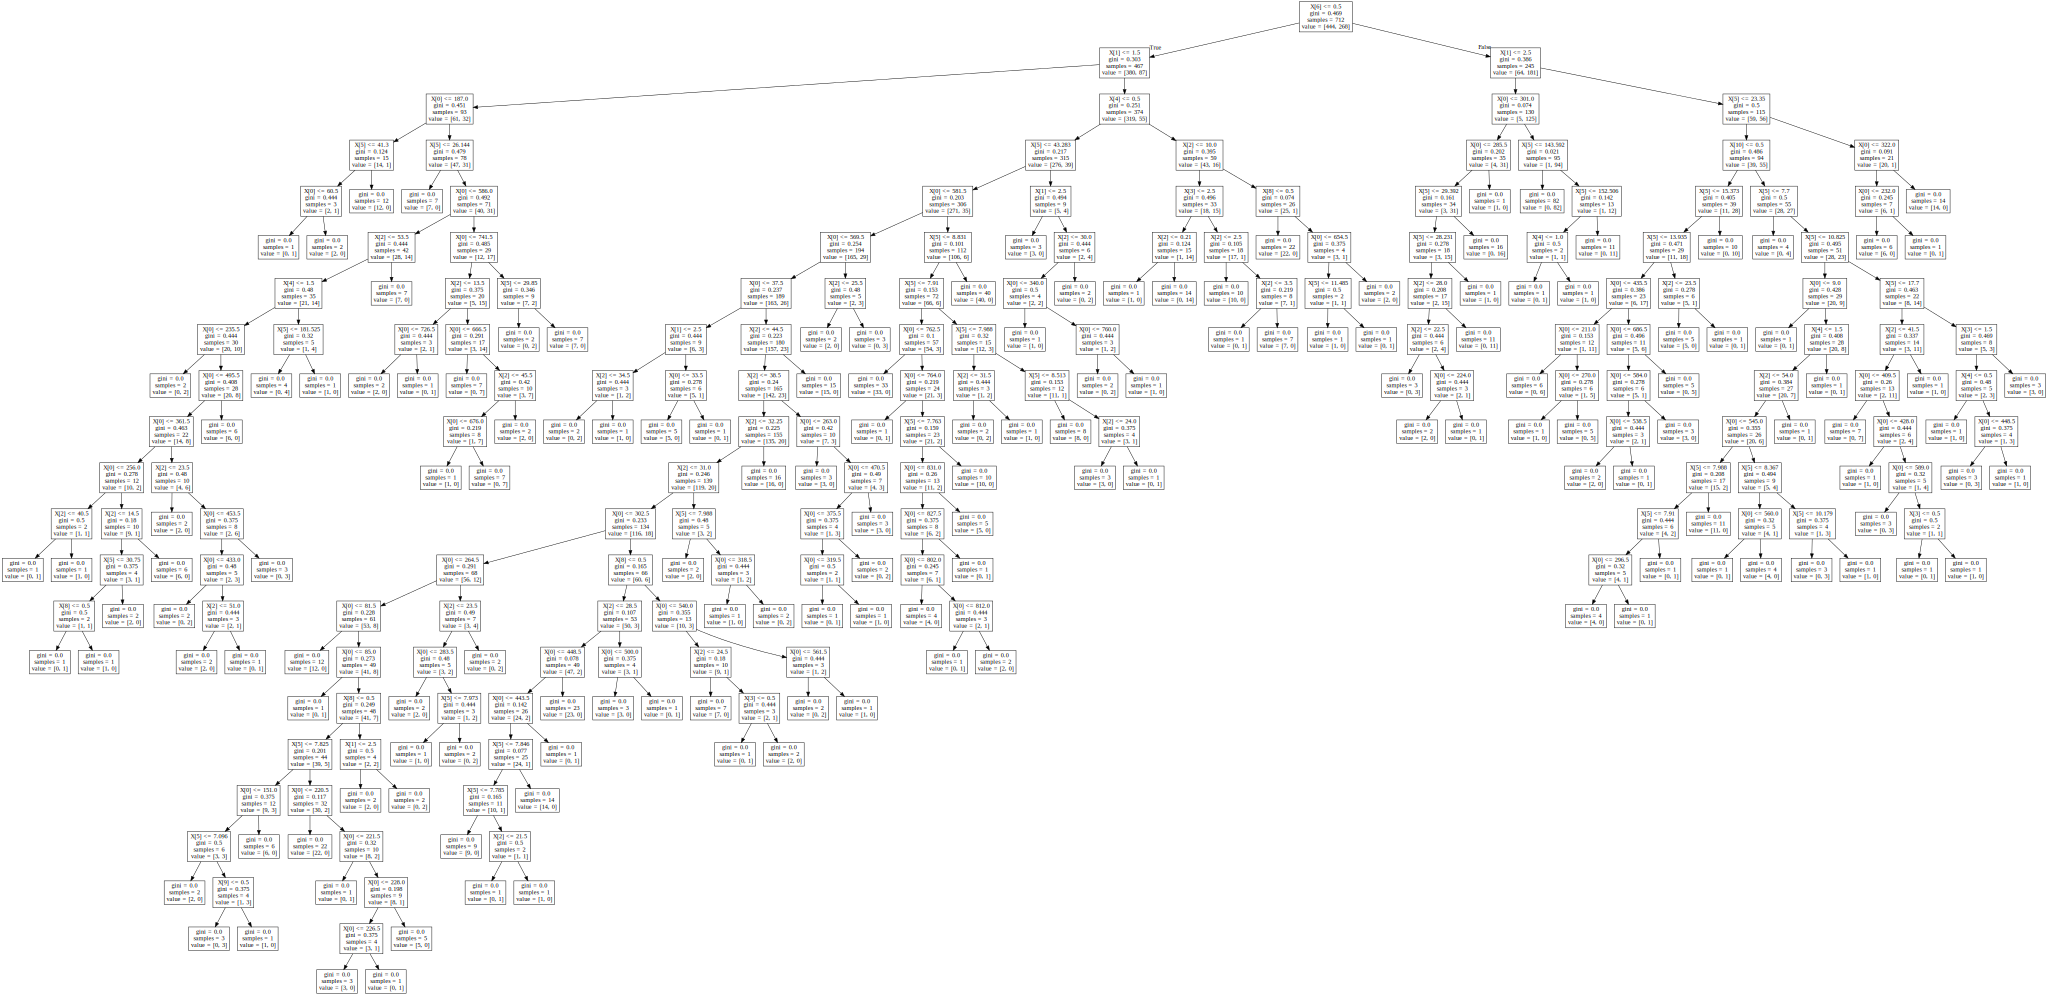

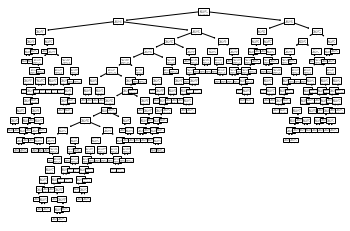

In [26]:
tree.plot_tree(model)
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Tree") 
graph

In [23]:
kaggle_test_data=pd.read_csv("test.csv")
kaggle_test_data.head()
kaggle_test_data=kaggle_test_data.drop(['Name','Cabin','Ticket'],axis=1)
kaggle_test_data=pd.get_dummies(kaggle_test_data)
kaggle_test_data=kaggle_test_data.fillna(0)
kaggle_predict=model.predict(kaggle_test_data)



In [24]:
output=pd.DataFrame({'PassengerId':kaggle_test_data.PassengerId, 'Survived':kaggle_predict})
output.to_csv('my_submission.csv', index=False)